# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

# Business Goal :
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Importing the libraries.¶

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### importing Lead Dataset

In [4]:
#read the data set of "leads" in inp0.
inp0= pd.read_csv(r"C:\Users\Vijayeendra\Downloads\Lead_Scoring_Case_Study\Lead Scoring Assignment\Leads.csv")

In [5]:
#Print the head of the data frame.
inp0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Interpretation and Cleaning for inp0 dataset

In [6]:
inp0.shape

(9240, 37)

In [7]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
inp0.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Checking duplicate values in the dataset
inp0[inp0.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [10]:
#checking null values in percentage
round(inp0.isnull().sum()/len(inp0.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [11]:
# Listing the columns with null values above 40%
inp0_35_missing_values = (inp0.columns[(round(100*(inp0.isnull().sum()/len(inp0.index)), 2)) >= 35]).tolist()
inp0_35_missing_values

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
# Dropping the columns with null values above 40%
inp0 = inp0.drop(inp0_35_missing_values,axis=1)

In [13]:
# Checking the null values for remaing coulmns
round(inp0.isnull().sum()/len(inp0.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

### Handling Missing Values in other columns

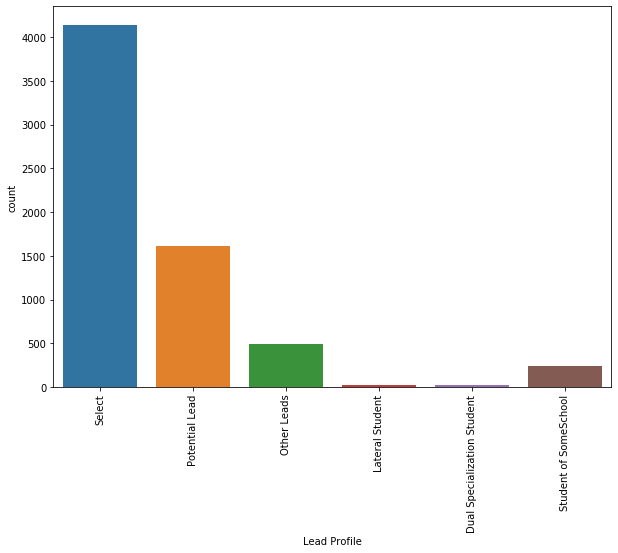

In [14]:
# 'Lead Profile' having 29% of missing values
# Visualising the 'Lead Profile' column

plt.figure(figsize=(10,7))
sns.countplot(inp0['Lead Profile'])
plt.xticks(rotation=90)
plt.show()

In [15]:
# The levels Lead Profile have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.
inp0.drop(['Lead Profile'], axis = 1, inplace = True)

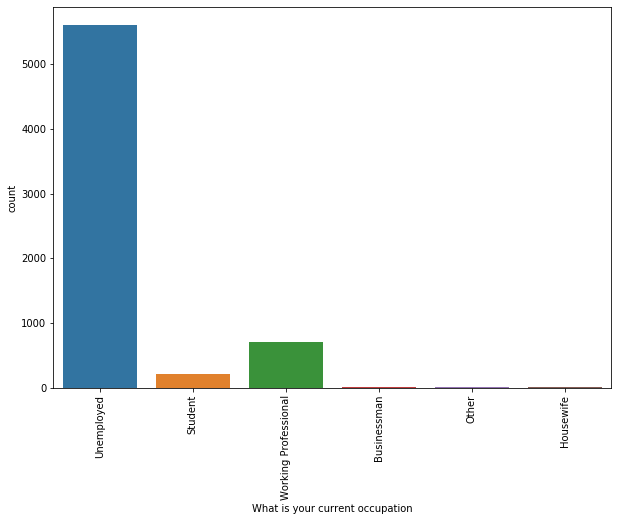

In [16]:
# 'What is your current occupation' having 29% of data missing
# Visualising the 'What is your current occupation' column

plt.figure(figsize=(10,7))
sns.countplot(inp0['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [17]:
#  adding and Imputing No Information' (new)   category for Null values in  'What is your current occupation' 
inp0['What is your current occupation'] = inp0['What is your current occupation'].replace(np.nan, 'No Information')

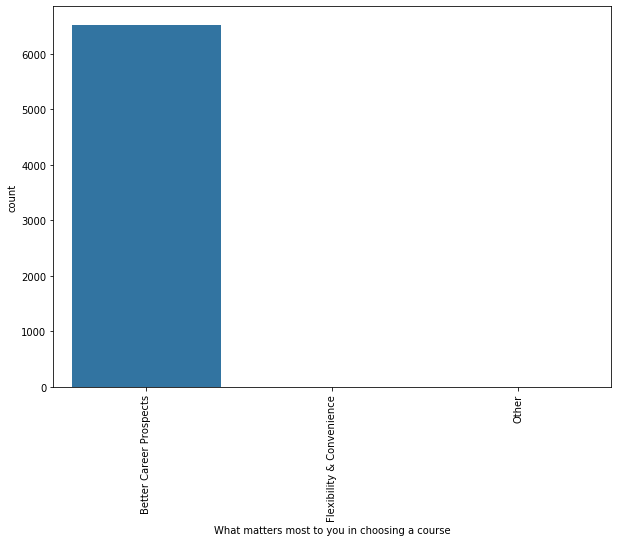

In [18]:
#'What matters most to you in choosing a course' having 29% of data missing
# Visualising the 'What matters most to you in choosing a course' column ??

plt.figure(figsize=(10,7))
sns.countplot(inp0['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [19]:
# since the column also has around 29% as missing values, we shall go ahead and drop the column
inp0.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

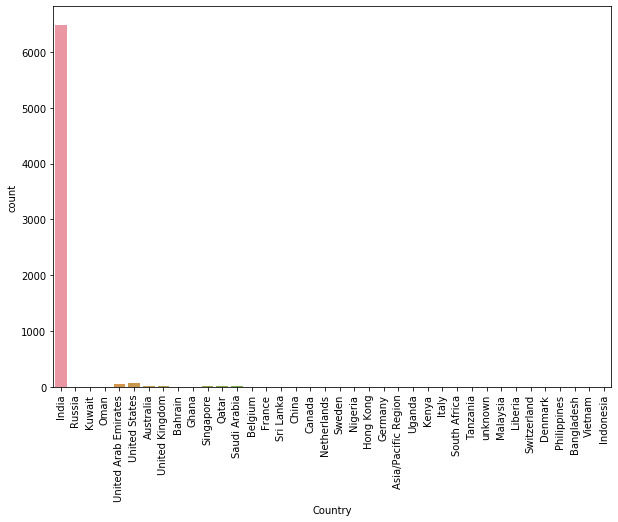

In [20]:
# 'Country' having 27% of data missing
# Visualising the 'Country' column

plt.figure(figsize=(10,7))
sns.countplot(inp0['Country'])
plt.xticks(rotation=90)
plt.show()

In [21]:
#Imputing the missing data in the 'Country' column with 'India' ## Drop Column
inp0['Country']=inp0['Country'].replace(np.nan,'India')

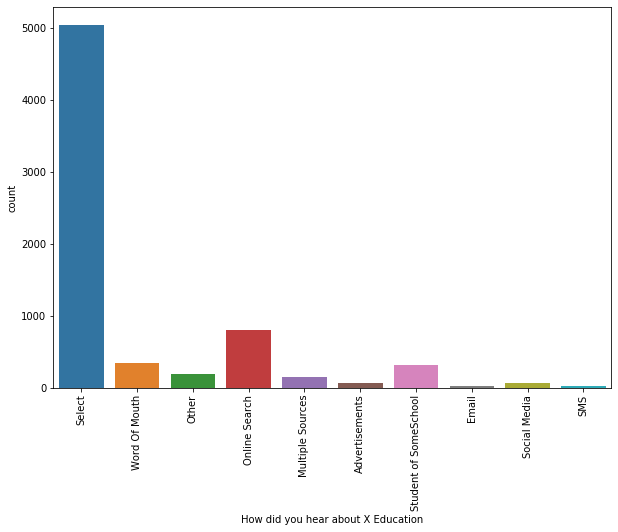

In [22]:
# 'How did you hear about X Education' having 24% of data missing
# Visualising the 'How did you hear about X Education' column

plt.figure(figsize=(10,7))
sns.countplot(inp0['How did you hear about X Education'])
plt.xticks(rotation=90)
plt.show()

In [23]:
# The levels 'How did you hear about X Education'  have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.
inp0.drop(['How did you hear about X Education' ], axis = 1, inplace = True)

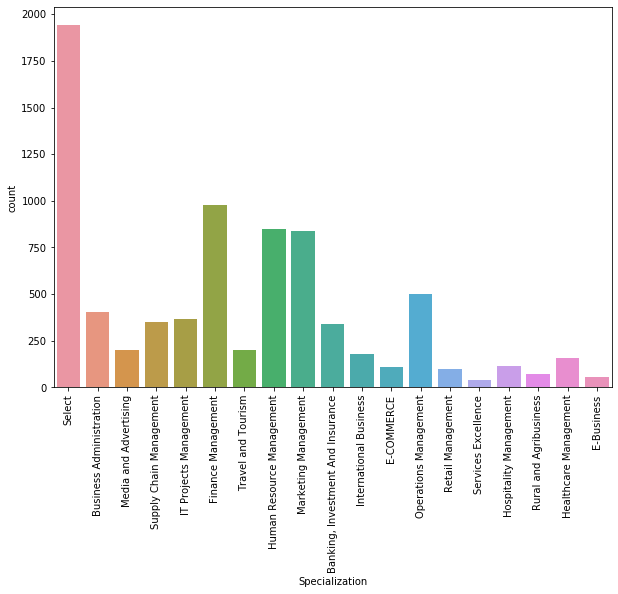

In [24]:
# 'Specialization' having 16% of data missing
# Visualising the 'Specialization' column

plt.figure(figsize=(10,7))
sns.countplot(inp0['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [25]:
# impute with new category called 'Others' for this 
inp0['Specialization'] = inp0['Specialization'].replace(np.nan, 'Others')

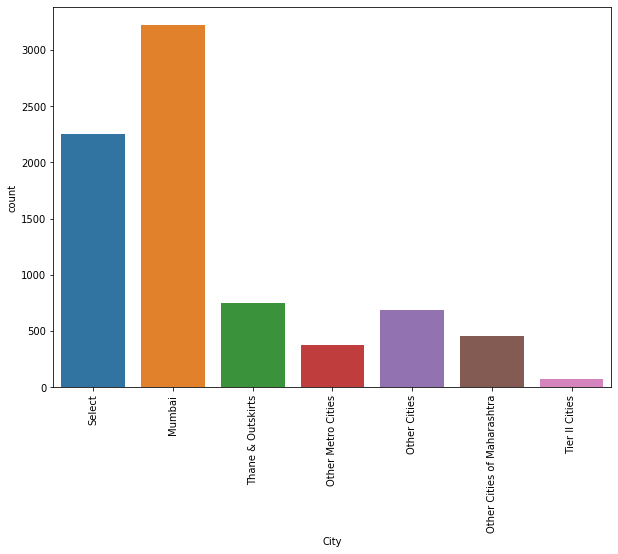

In [26]:
# 'City' having 15% of data missing
# Visualising the 'City' column

plt.figure(figsize=(10,7))
sns.countplot(inp0['City'])
plt.xticks(rotation=90)
plt.show()

In [27]:
#As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.
inp0['City']=inp0['City'].replace(np.nan,'Mumbai')

In [28]:
# 'TotalVisits' having 1% of data missing
# Check the value counts for the column Total Visits
inp0['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [29]:
# Check the median of column 

inp0['TotalVisits'].median()

3.0

In [30]:

# We shall impute the null values in TotalVisits by the median value which is 3.0

inp0['TotalVisits'] = inp0['TotalVisits'].replace(np.nan, inp0['TotalVisits'].median())

In [31]:
# 'Page Views Per Visit' having 1% of data missing
# Check the value counts for the column
inp0['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [32]:
# Check the median of column 

inp0['Page Views Per Visit'].median()

2.0

In [33]:

# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

inp0['Page Views Per Visit'] = inp0['Page Views Per Visit'].replace(np.nan, inp0['Page Views Per Visit'].median())

In [34]:
# 'Last Activity' having 1% of data missing
# Check the value counts for the column
inp0['Last Activity' ].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [35]:

# adding a new category called 'Not Sure' for the null values

inp0['Last Activity'] = inp0['Last Activity'].replace(np.nan, 'Not Sure')

In [36]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
Prospect ID                                 9240 non-null object
Lead Number                                 9240 non-null int64
Lead Origin                                 9240 non-null object
Lead Source                                 9204 non-null object
Do Not Email                                9240 non-null object
Do Not Call                                 9240 non-null object
Converted                                   9240 non-null int64
TotalVisits                                 9240 non-null float64
Total Time Spent on Website                 9240 non-null int64
Page Views Per Visit                        9240 non-null float64
Last Activity                               9240 non-null object
Country                                     9240 non-null object
Specialization                              9240 non-null object
What is your current occupation             9240 

In [37]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

inp0 = inp0.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [38]:
# The variables Prospect ID and Lead Number won't be of any use in the analysis,so dropping these two variables.

inp0.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [39]:
#checking null values in percentage again
round(inp0.isnull().sum()/len(inp0.index),2)*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [40]:
inp0.shape

(9240, 21)

### Checking Outliers 

In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and above
inp0.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


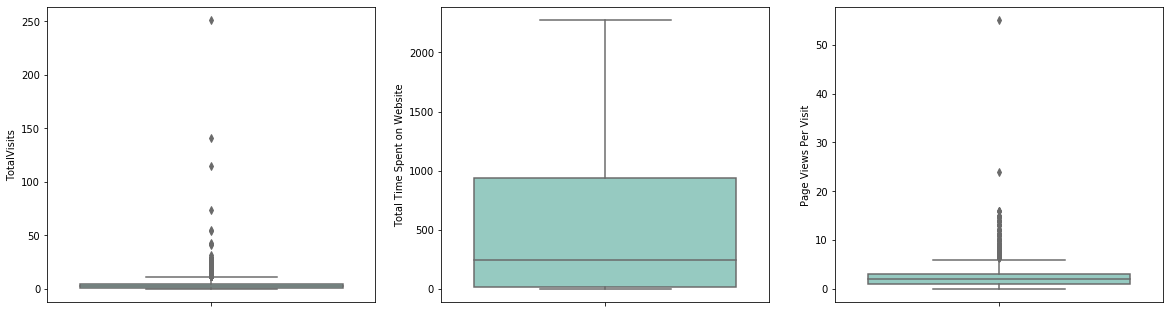

In [42]:
# The outlier exists in the columns TotalVisits, 'Total Time Spent on Website' and Page Views Per Visit columns.
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = inp0)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = inp0)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = inp0)
plt.show()

In [43]:
# Removing values beyond 99% for Total Visits

total_visits_quantile = inp0['TotalVisits'].quantile(0.99)
inp0 = inp0[inp0["TotalVisits"] < total_visits_quantile]
inp0["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [44]:
# Removing values beyond 99% for page Views Per Visit

page_visits_quantile = inp0['Page Views Per Visit'].quantile(0.99)
inp0 = inp0[inp0["Page Views Per Visit"] < page_visits_quantile]
inp0["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

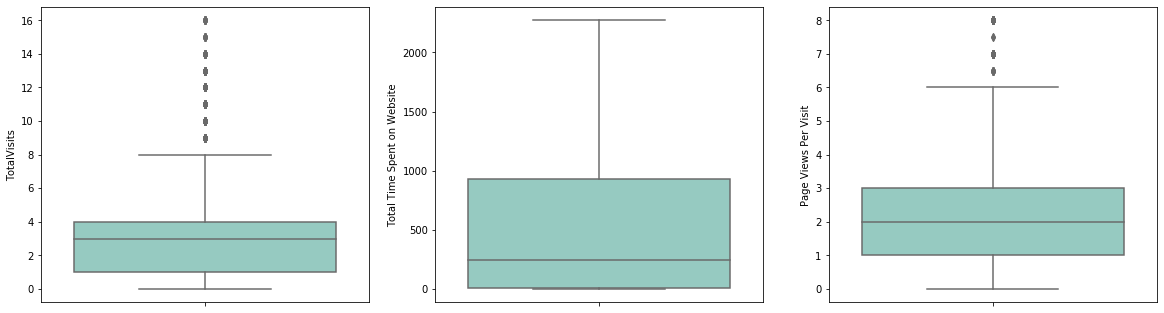

In [45]:
# The outlier exists in the columns TotalVisits, 'Total Time Spent on Website' and Page Views Per Visit columns.
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = inp0)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = inp0)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = inp0)
plt.show()

In [46]:
# Determine the percentage of data retained

data_retained = round(100*(len(inp0)/9240),2)
print(data_retained)

97.72


# Data Analysis

### Univariate Analysis and Bivariate Analysis

### Analysis the data based on conversion rates with each coulmn

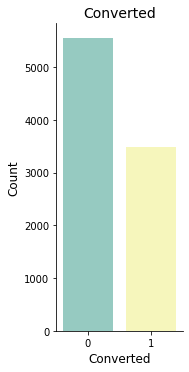

In [47]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=inp0, palette="Set3",aspect= 0.5);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
    
plt.show()

In [48]:
# Checking the Lead Conversion rate
Conversion = round((sum(inp0['Converted'])/len(inp0['Converted'].index))*100,2)
Conversion

38.51

### Overall conversion rate of around 38.51%

Text(11.00300245098039, 0.5, 'Count')

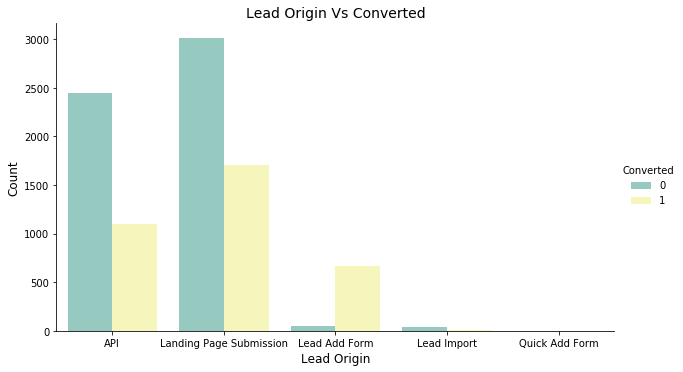

In [49]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

###  The maximum conversion happened from Landing Page Submission Also there was only one request from quick add form which got converted.

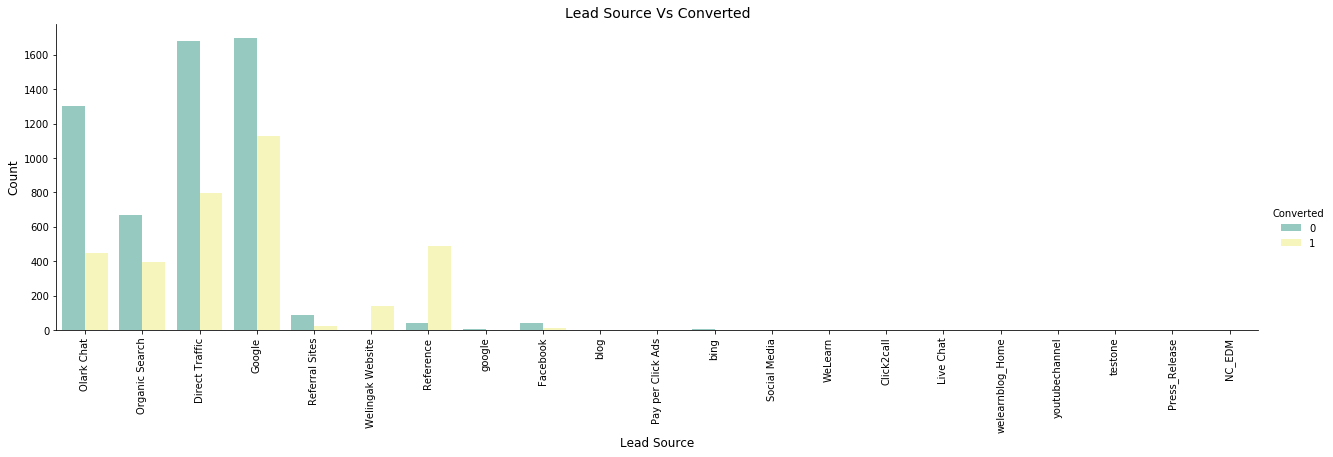

In [50]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

In [51]:
# Handling Data inconsistaency and Creating a new category 'Others' for some of the Lead Sources which do not have much values.
inp0['Lead Source'] = inp0['Lead Source'].replace(['google'], 'Google')
inp0['Lead Source'] = inp0['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat',
                                                    'welearnblog_Home', 'youtubechannel','testone','Press_Release', 'NC_EDM'], 'Others')

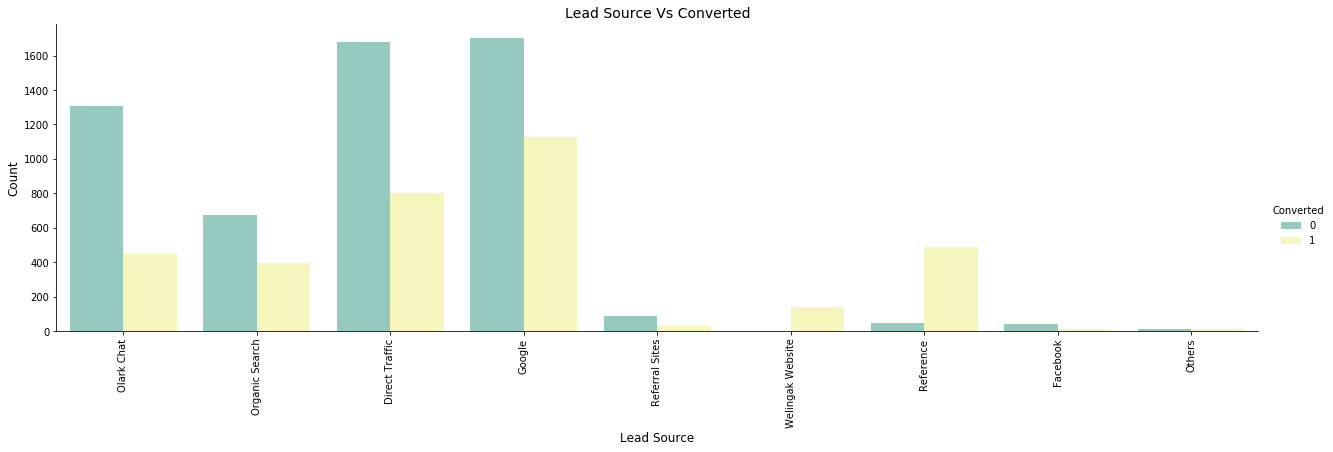

In [52]:
# Plotting Lead Source again

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### Major conversion in the lead source is from 'Google'

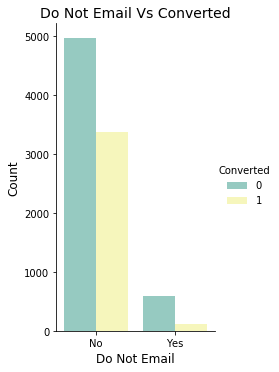

In [53]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Major conversion has happend from the emails that have been sent

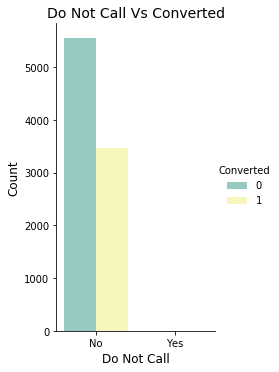

In [54]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Major conversions happened when calls were made. 

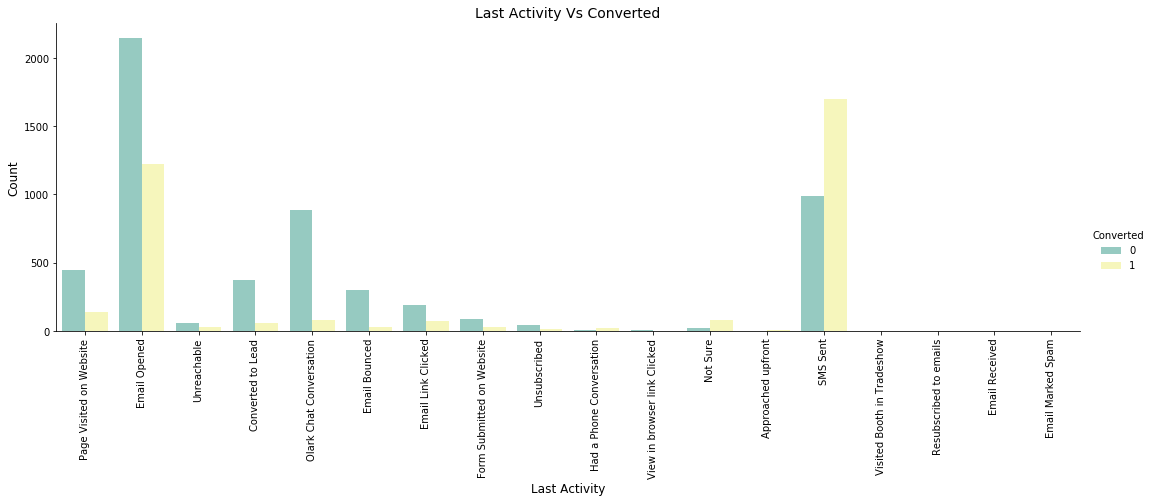

In [55]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### As per the above graph, last activity value of 'SMS Sent' had more conversion

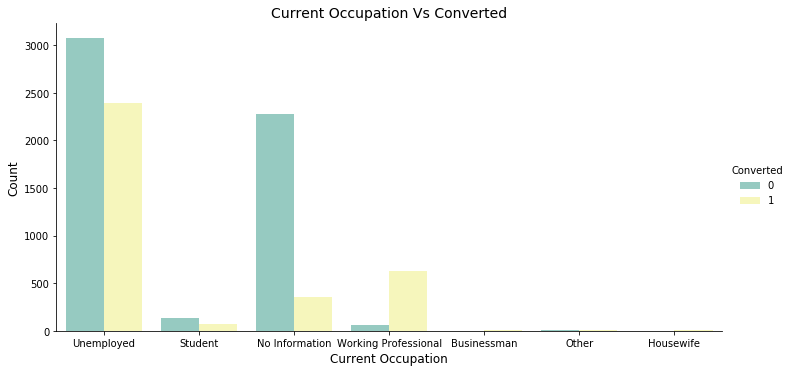

In [56]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=inp0, palette="Set3", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### More conversion happend with people who are unemployed.

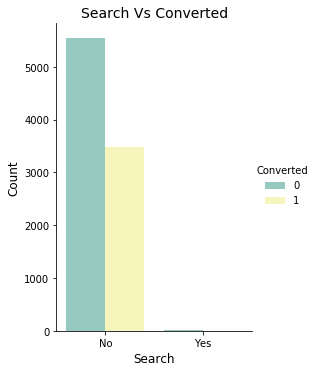

In [57]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Conversion rate is high on leads who are not through search

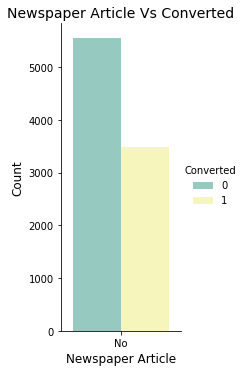

In [58]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()


### Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [59]:
# Dropping Newspaper Article

inp0 = inp0.drop(['Newspaper Article'], axis=1)

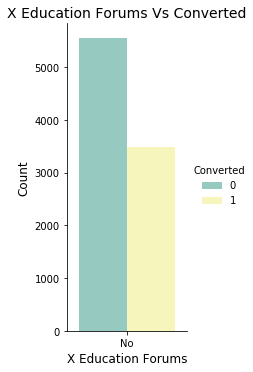

In [60]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [61]:
# Dropping X Education Forum column

inp0 = inp0.drop(['X Education Forums'], axis=1)

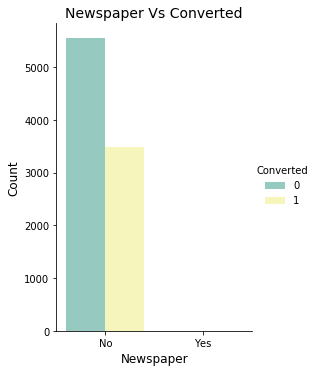

In [62]:
# Newspaper
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Since "Newspaper" column now has only one value for all rows - "No" , it is safe to drop this column

In [63]:
# Dropping Newspaper column

inp0 = inp0.drop(['Newspaper'], axis=1)

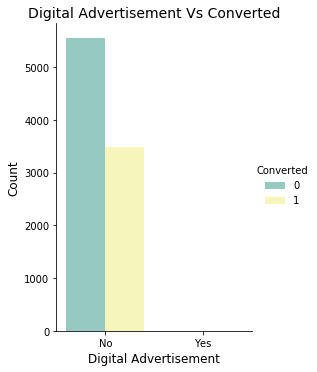

In [64]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=inp0, palette="Set3", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### No Lead conversion from 'Digital Advertisement' 

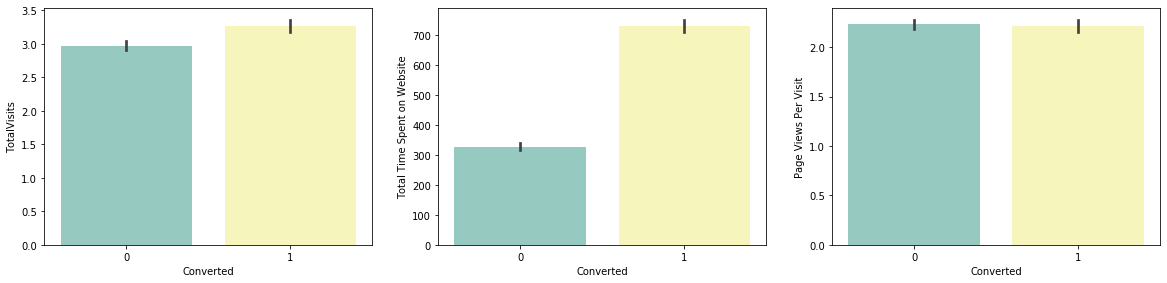

In [65]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set3', data = inp0)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set3', data = inp0)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set3', data = inp0)
plt.show()

### The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

In [66]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 18 columns):
Lead Origin                               9029 non-null object
Lead Source                               8993 non-null object
Do Not Email                              9029 non-null object
Do Not Call                               9029 non-null object
Converted                                 9029 non-null int64
TotalVisits                               9029 non-null float64
Total Time Spent on Website               9029 non-null int64
Page Views Per Visit                      9029 non-null float64
Last Activity                             9029 non-null object
Country                                   9029 non-null object
Specialization                            9029 non-null object
What is your current occupation           9029 non-null object
Search                                    9029 non-null object
Digital Advertisement                     9029 non-null object
Through Rec

In [67]:
#Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

inp0 = inp0.drop(['Country','Search','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview'],axis = 1)

# Data Preparation 

### Creating Dummies

In [68]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 13 columns):
Lead Origin                        9029 non-null object
Lead Source                        8993 non-null object
Do Not Email                       9029 non-null object
Do Not Call                        9029 non-null object
Converted                          9029 non-null int64
TotalVisits                        9029 non-null float64
Total Time Spent on Website        9029 non-null int64
Page Views Per Visit               9029 non-null float64
Last Activity                      9029 non-null object
Specialization                     9029 non-null object
What is your current occupation    9029 non-null object
City                               9029 non-null object
Last Notable Activity              9029 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1.3+ MB


In [69]:
inp0.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


#### Converting some binary variables (Yes/No) to 0/1

In [70]:
var_list =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
inp0[var_list] = inp0[var_list].apply(binary_map)

inp0.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified


In [71]:
# Creating dummies for the following columns below

dummy_data = pd.get_dummies(inp0[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()



,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
# Concatenating the dummy_data to the lead_data dataframe
inp0 = pd.concat([inp0, dummy_data], axis=1)
inp0.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,...,0,0,1,0,0,0,0,0,0,0


In [73]:
# Dropping the columns for which dummies were created

inp0 = inp0.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [74]:
inp0.shape

(9029, 81)

# Test-Train Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
# Putting feature variable to X

X = inp0.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
# Putting response variable to y

y = inp0['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

#  Rescaling the features with MinMax Scaling

In [79]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2240,0,0,3.0,1993,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,5.0,1566,5.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4132,0,0,6.0,1703,6.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5573,0,0,2.0,64,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,1.0,20,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model Building

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)           
rfe = rfe.fit(X_train, y_train)

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 16),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Others', False, 31),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 42),
 ('Last Activity_Email Marked Spam', False, 9),
 ('Last Activity_Email Opened', False, 28),
 ('Last Activity_Email Received', False, 46),
 ('Last Activity_Form Submitted on Website', False, 2),
 ('Las

In [84]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Not Sure', 'Last Activity_Olark Chat Conversation',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_No Information',
       'What is your current occupation_Working Professional', 'City_Select',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 1

In [85]:
import statsmodels.api as sm

In [86]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.8
Date:                Sun, 18 Jun 2023   Deviance:                       4963.7
Time:                        01:22:01   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3207      0.156     -8.491      0.000      -1.626      -1.016
Do Not Email                                            -1.0730      0.195     -5.515      0.000      -1.454      -0.692
TotalVisits                                              1.0236      0.253      4.043      0.000       0.527       1.520
Total Time Spent on Website                              4.4810      0.169     26.526      0.000       4.150       4.812
Lead Origin_Landing Page Submission                     -1.1180      0.136     -8.235      0.000      -1.384      -0.852
Lead Origin_Lead Add Form                                3.4495      0.225     15.326      0.000       3.008       3.891
Lead Source_Olark Chat                                   1.4371      0.138     10.380      0.000       1.166       1.709
Lead Source_Welingak Website                             2.4873      0.745      3.339      0.001       1.027       3.947
Last Activity_Converted to Lead                         -0.9401      0.217     -4.337      0.000      -1.365      -0.515
Last Activity_Email Bounced                             -1.6468      0.504     -3.266      0.001      -2.635      -0.659
Last Activity_Not Sure                                  -1.9136      0.439     -4.363      0.000      -2.773      -1.054
Last Activity_Olark Chat Conversation                   -1.3548      0.171     -7.900      0.000      -1.691      -1.019
Specialization_Others                                   -1.1700      0.197     -5.945      0.000      -1.556      -0.784
What is your current occupation_Housewife               22.8576   1.41e+04      0.002      0.999   -2.76e+04    2.77e+04
What is your current occupation_No Information          -1.0319      0.118     -8.726      0.000      -1.264      -0.800
What is your current occupation_Working Professional     2.7032      0.205     13.166      0.000       2.301       3.106
City_Select                                             -0.9984      0.136     -7.350      0.000      -1.265      -0.732
Last Notable Activity_Email Bounced                      1.6429      0.683      2.405      0.016       0.304       2.982
Last Notable Activity_Had a Phone Conversation           3.0382      1.183      2.568      0.010       0.719       5.357
Last Notable Activity_SMS Sent                           1.5057      0.083     18.100      0.000       1.343       1.669
Last Notable Activity_Unreachable                        1.5771      0.556      2.838      0.005       0.488       2.666
========================================================================================================================
"""

In [87]:
# Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

### Model 2

In [88]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.9
Date:                Sun, 18 Jun 2023   Deviance:                       4975.9
Time:                        01:22:01   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3059      0.155     -8.409      0.000      -1.610      -1.002
Do Not Email                                            -1.0772      0.194     -5.539      0.000      -1.458      -0.696
TotalVisits                                              1.0033      0.253      3.967      0.000       0.508       1.499
Total Time Spent on Website                              4.4754      0.169     26.518      0.000       4.145       4.806
Lead Origin_Landing Page Submission                     -1.1142      0.136     -8.220      0.000      -1.380      -0.849
Lead Origin_Lead Add Form                                3.4513      0.225     15.345      0.000       3.010       3.892
Lead Source_Olark Chat                                   1.4306      0.138     10.342      0.000       1.160       1.702
Lead Source_Welingak Website                             2.4764      0.745      3.325      0.001       1.016       3.936
Last Activity_Converted to Lead                         -0.9494      0.217     -4.382      0.000      -1.374      -0.525
Last Activity_Email Bounced                             -1.6514      0.504     -3.276      0.001      -2.639      -0.663
Last Activity_Not Sure                                  -1.8952      0.436     -4.344      0.000      -2.750      -1.040
Last Activity_Olark Chat Conversation                   -1.3573      0.171     -7.917      0.000      -1.693      -1.021
Specialization_Others                                   -1.1681      0.197     -5.940      0.000      -1.554      -0.783
What is your current occupation_No Information          -1.0395      0.118     -8.799      0.000      -1.271      -0.808
What is your current occupation_Working Professional     2.6958      0.205     13.134      0.000       2.294       3.098
City_Select                                             -1.0045      0.136     -7.403      0.000      -1.270      -0.739
Last Notable Activity_Email Bounced                      1.6467      0.683      2.411      0.016       0.308       2.985
Last Notable Activity_Had a Phone Conversation           3.0303      1.183      2.561      0.010       0.711       5.349
Last Notable Activity_SMS Sent                           1.4983      0.083     18.030      0.000       1.335       1.661
Last Notable Activity_Unreachable                        1.5716      0.556      2.827      0.005       0.482       2.661
========================================================================================================================
"""

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.40
11,Specialization_Others,3.27
1,TotalVisits,2.98
12,What is your current occupation_No Information,2.87
2,Total Time Spent on Website,2.18
5,Lead Source_Olark Chat,2.18
14,City_Select,2.06
8,Last Activity_Email Bounced,1.99
0,Do Not Email,1.83
4,Lead Origin_Lead Add Form,1.72


In [90]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 2240 to 7430
Data columns (total 20 columns):
const                                                   6320 non-null float64
Do Not Email                                            6320 non-null int64
TotalVisits                                             6320 non-null float64
Total Time Spent on Website                             6320 non-null float64
Lead Origin_Landing Page Submission                     6320 non-null uint8
Lead Origin_Lead Add Form                               6320 non-null uint8
Lead Source_Olark Chat                                  6320 non-null uint8
Lead Source_Welingak Website                            6320 non-null uint8
Last Activity_Converted to Lead                         6320 non-null uint8
Last Activity_Email Bounced                             6320 non-null uint8
Last Activity_Not Sure                                  6320 non-null uint8
Last Activity_Olark Chat Conversation           

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 2240 to 7430
Data columns (total 80 columns):
Do Not Email                                            6320 non-null int64
Do Not Call                                             6320 non-null int64
TotalVisits                                             6320 non-null float64
Total Time Spent on Website                             6320 non-null float64
Page Views Per Visit                                    6320 non-null float64
Lead Origin_Landing Page Submission                     6320 non-null uint8
Lead Origin_Lead Add Form                               6320 non-null uint8
Lead Origin_Lead Import                                 6320 non-null uint8
Lead Origin_Quick Add Form                              6320 non-null uint8
Lead Source_Facebook                                    6320 non-null uint8
Lead Source_Google                                      6320 non-null uint8
Lead Source_Olark Chat                          

In [92]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.679548
113     0.553536
4132    0.801216
5573    0.102890
1109    0.012619
2282    0.040867
2976    0.819385
8431    0.460591
2770    0.757837
5790    0.995203
dtype: float64

In [93]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.6795483 , 0.55353556, 0.80121602, 0.10289043, 0.01261898,
       0.04086651, 0.81938483, 0.46059074, 0.75783728, 0.99520311])

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.679548,2240
1,0,0.553536,113
2,1,0.801216,4132
3,0,0.102890,5573
4,0,0.012619,1109


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels¶
#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.679548,2240,1
1,0,0.553536,113,1
2,1,0.801216,4132,1
3,0,0.102890,5573,0
4,0,0.012619,1109,0


In [96]:
# Making the Confusion Matrix

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3391  467]
 [ 691 1771]]


In [97]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8167721518987342


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7193338748984566


In [100]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8789528252980819


In [101]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.12104717470191809


In [102]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7913315460232351


In [103]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8307202351788339


#### Plotting the ROC Curve
#### An ROC curve demonstrates several things:

#### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
#### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
#### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

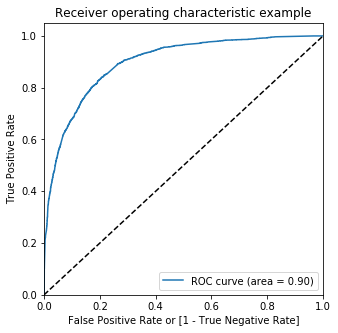

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


### Finding Optimal Cutoff Point

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.679548,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.553536,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.801216,4132,1,1,1,1,1,1,1,1,1,1,0
3,0,0.102890,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.012619,1109,0,1,0,0,0,0,0,0,0,0,0


In [108]:
	0
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.634968  0.975223  0.417833
0.2   0.2  0.770728  0.919984  0.675480
0.3   0.3  0.806804  0.852965  0.777346
0.4   0.4  0.818513  0.792851  0.834889
0.5   0.5  0.816772  0.719334  0.878953
0.6   0.6  0.811867  0.648660  0.916019
0.7   0.7  0.792880  0.545085  0.951011
0.8   0.8  0.765981  0.446385  0.969933
0.9   0.9  0.721994  0.305849  0.987558


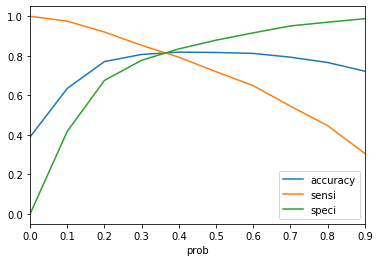

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.¶


In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.679548,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.553536,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.801216,4132,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.102890,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.012619,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
# Assigning Lead Score to the Training data


y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.679548,2240,1,1,1,1,1,1,1,1,0,0,0,1,68
1,0,0.553536,113,1,1,1,1,1,1,1,0,0,0,0,1,55
2,1,0.801216,4132,1,1,1,1,1,1,1,1,1,1,0,1,80
3,0,0.102890,5573,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.012619,1109,0,1,0,0,0,0,0,0,0,0,0,0,1


### Model Evaluation

In [112]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8185126582278481


In [113]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3221,  637],
       [ 510, 1952]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7928513403736799


In [116]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.834888543286677


In [117]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.16511145671332297


In [118]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7539590575511781


In [119]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8633074242830341


In [120]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3391,  467],
       [ 691, 1771]], dtype=int64)

In [121]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7913315460232351


In [122]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7193338748984566


In [123]:
y_train_pred_final

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.679548,2240,1,1,1,1,1,1,1,1,0,0,0,1,68
1,0,0.553536,113,1,1,1,1,1,1,1,0,0,0,0,1,55
2,1,0.801216,4132,1,1,1,1,1,1,1,1,1,1,0,1,80
3,0,0.102890,5573,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.012619,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6315,1,0.500019,5854,1,1,1,1,1,1,1,0,0,0,0,1,50
6316,1,0.974511,5292,1,1,1,1,1,1,1,1,1,1,1,1,97
6317,0,0.118993,5496,0,1,1,0,0,0,0,0,0,0,0,0,12
6318,0,0.003823,885,0,1,0,0,0,0,0,0,0,0,0,0,0


In [124]:
from sklearn.metrics import precision_score, recall_score


In [125]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7913315460232351


In [126]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7193338748984566


In [127]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

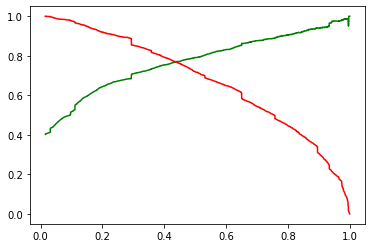

In [129]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [131]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_No Information,What is your current occupation_Working Professional,City_Select,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
2296,0,0.1875,0.665313,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8697,0,0.4375,0.184032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7378,0,0.1250,0.163284,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4799,0,0.5000,0.744700,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [132]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2296    0.904121
8697    0.584379
7378    0.173081
8631    0.456606
4799    0.953576
4503    0.357879
7129    0.971823
1717    0.110768
8398    0.882916
5116    0.293222
dtype: float64

In [133]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:
# Let's see the head
y_pred_1.head()

,0
2296,0.904121
8697,0.584379
7378,0.173081
8631,0.456606
4799,0.953576


In [135]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [136]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [137]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [139]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [140]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [141]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8180140273163529

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1414,  280],
       [ 213,  802]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Calculate sensitivity
TP / float(TP+FN)

0.7901477832512315

In [145]:
# Calculate specificity
TN / float(TN+FP)

0.8347107438016529

In [146]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob,final_predicted,Lead_Score
0,1,2296,0.904121,1,90
1,0,8697,0.584379,1,58
2,0,7378,0.173081,0,17
3,0,8631,0.456606,1,46
4,1,4799,0.953576,1,95


In [147]:
y_pred_final

,Converted,Prospect ID,Conversion_Prob,final_predicted,Lead_Score
0,1,2296,0.904121,1,90
1,0,8697,0.584379,1,58
2,0,7378,0.173081,0,17
3,0,8631,0.456606,1,46
4,1,4799,0.953576,1,95
...,...,...,...,...,...
2704,0,8688,0.059269,0,6
2705,0,7783,0.155396,0,16
2706,1,6255,0.649888,1,65
2707,1,5390,0.974511,1,97


####  Comparing the values obtained for Train & Test:

#### Train Data:

#### Accuracy : 81.8 %

#### Sensitivity : 79.28 %

#### Specificity : 83.48 %

#### Test Data:

#### Accuracy : 81.8 %

#### Sensitivity : 79.01 %

#### Specificity : 83.47 %

In [148]:
#print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))
y_pred_final

,Converted,Prospect ID,Conversion_Prob,final_predicted,Lead_Score
0,1,2296,0.904121,1,90
1,0,8697,0.584379,1,58
2,0,7378,0.173081,0,17
3,0,8631,0.456606,1,46
4,1,4799,0.953576,1,95
...,...,...,...,...,...
2704,0,8688,0.059269,0,6
2705,0,7783,0.155396,0,16
2706,1,6255,0.649888,1,65
2707,1,5390,0.974511,1,97


In [155]:
print("Precision :",precision_score(y_pred_final.Converted , y_pred_final.final_predicted))

Precision : 0.7412199630314233


In [150]:
print("Recall :",recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Recall : 0.7901477832512315


In [151]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Converted,Prospect ID,Conversion_Prob,final_predicted,Lead_Score
0,1,2296,0.904121,1,90
4,1,4799,0.953576,1,95
6,0,7129,0.971823,1,97
8,0,8398,0.882916,1,88
24,1,3168,0.972768,1,97
...,...,...,...,...,...
2686,0,5610,0.858935,1,86
2695,1,3012,0.867443,1,87
2698,0,8665,0.795908,1,80
2699,1,1585,0.933342,1,93


In [152]:
res.params.sort_values(ascending=False)

Total Time Spent on Website                             4.475394
Lead Origin_Lead Add Form                               3.451260
Last Notable Activity_Had a Phone Conversation          3.030310
What is your current occupation_Working Professional    2.695785
Lead Source_Welingak Website                            2.476353
Last Notable Activity_Email Bounced                     1.646715
Last Notable Activity_Unreachable                       1.571573
Last Notable Activity_SMS Sent                          1.498336
Lead Source_Olark Chat                                  1.430614
TotalVisits                                             1.003293
Last Activity_Converted to Lead                        -0.949401
City_Select                                            -1.004479
What is your current occupation_No Information         -1.039512
Do Not Email                                           -1.077199
Lead Origin_Landing Page Submission                    -1.114198
Specialization_Others    

In [156]:
Precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

In [157]:
Precision

0.7412199630314233

In [158]:
Recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
Recall


0.7901477832512315

In [159]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.7649022412970912

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [161]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )


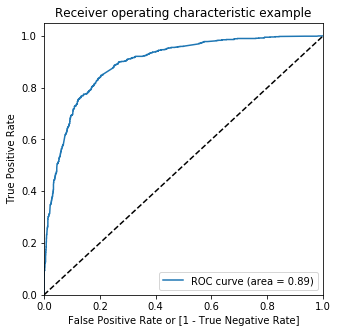

(array([0.        , 0.        , 0.        , ..., 0.99881936, 0.99940968,
        1.        ]),
 array([0.00000000e+00, 9.85221675e-04, 1.97044335e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99966774, 0.99966774, 0.99941654, ..., 0.0025324 , 0.00246349,
        0.00234555]))

In [162]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)


In [163]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [164]:
auc = auc_val(fpr,tpr)
auc

0.8949709493372786



#### *As a rule of thumb, an AUC can be classed as follows,*

#### 0.90 - 1.00 = excellent
#### 0.80 - 0.90 = good
#### 0.70 - 0.80 = fair
#### 0.60 - 0.70 = poor
#### 0.50 - 0.60 = fail